NUMERICAL DATA

In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [7]:
X = df.drop(columns=['Survived'])
Y = df['Survived']

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [9]:
X_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


In [10]:
#BEFORE CHANGING
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [11]:
X_train.tail()

,Age,Fare,Age_imputed
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN
168,NaN,25.9250,NaN


In [12]:
#AFTER CHANGING
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [13]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,19.0
493,71.0,49.5042,71.0
527,NaN,221.7792,24.0


<ipython-input-14-21ce47adc263>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
<ipython-input-14-21ce47adc263>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'],label='Imputed',hist=False)


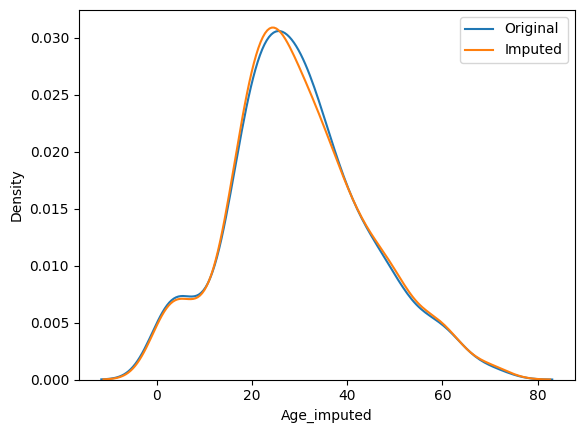

In [14]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label='Imputed',hist=False)

plt.legend()
plt.show()

In [15]:
print('Original variable variance: ',X_train['Age'].var())
print('Variance after random imputation: ',X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  207.79856164209295


In [16]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,73.018191
Age,71.512440,204.349513,204.349513
Age_imputed,73.018191,204.349513,207.798562


<Axes: >

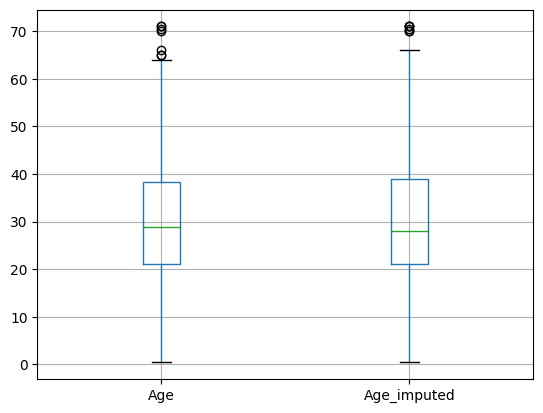

In [17]:
#outliers
X_train[['Age','Age_imputed']].boxplot()

In [ ]:
#random num will be different but the situation can be possible that with same input,imputed value comes different for 2 different users
#so to avoid this problem:
sampled_value = X_train['Age'].dropna().sample(1, random_state =int(observation['Fare']))

CATEGORICAL DATA

In [19]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [20]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [23]:
data.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [22]:
X=data
Y=data['SalePrice']

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [25]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [26]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
366,Gd,TA,159000,TA,Gd
1334,NaN,TA,125000,TA,NaN
835,NaN,TA,128000,TA,NaN
780,TA,TA,176000,TA,TA
489,NaN,TA,86000,TA,NaN


In [27]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values


<ipython-input-27-583f4b8dbeed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
<ipython-input-27-583f4b8dbeed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
<ipython-input-27-583f4b8dbeed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

In [30]:
#checking freq of categ in categorical columns before and after imputation
temp=pd.concat(
    [
        X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts() / len(X_train)
    ],
    axis=1)

temp.columns = ['original','imputed']
temp

,original,imputed
TA,0.951043,0.951199
Fa,0.037171,0.036815
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [31]:
#checking freq of categ in categorical columns before and after imputation
temp=pd.concat(
    [
        X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
        X_train['FireplaceQu_imputed'].value_counts() / len(X_train)
    ],
    axis=1)

temp.columns = ['original','imputed']
temp

,original,imputed
Gd,0.494272,0.492295
TA,0.412439,0.412671
Fa,0.040917,0.041096
Po,0.027823,0.028253
Ex,0.024550,0.025685


<ipython-input-34-161b6cddc714>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
<ipython-input-34-161b6cddc714>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] =

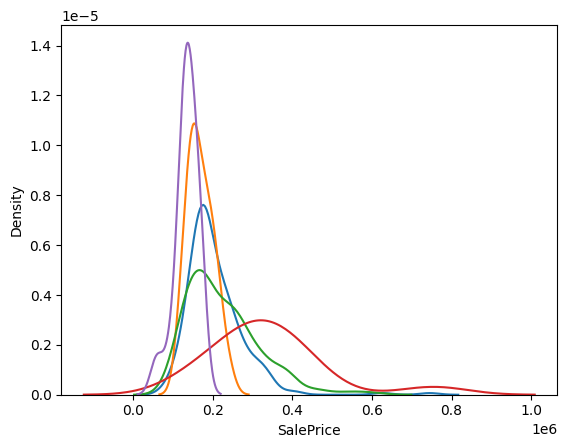

In [34]:
for category in X_train['FireplaceQu'].dropna().unique():
  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

<ipython-input-35-d3f39c657053>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
<ipython-input-35-d3f39c657053>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['Firepla

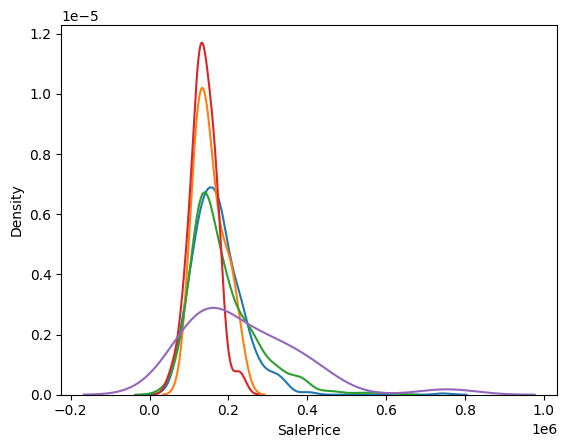

In [35]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()